In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
points = np.array([[ 0.5,  0.5, 0, 1], 
                   [ 0.5, -0.5, 0, 1],
                   [-0.5,  0.5, 0, 1],
                   [-0.5, -0.5, 0, 1],
                   [ 0.5,  0.5, 1, 1],
                   [ 0.5, -0.5, 1, 1],
                   [-0.5,  0.5, 1, 1],
                   [-0.5, -0.5, 1, 1]]
                 )

In [19]:
from numpy.linalg import inv
def inv_homogenous_matrix(rvec, tvec):
    #https://mathematica.stackexchange.com/questions/106257/how-do-i-get-the-inverse-of-a-homogeneous-transformation-matrix
    rvec_out = inv(rvec)
    tvec_out = np.matmul(-1*rvec_out, tvec)
    return rvec_out, tvec_out

In [28]:
roll, pitch, yaw = 0, 0, 0.6
camera_tvec = np.array([-2, -2, 0.5])
Ry = [[np.cos(pitch), 0, np.sin(pitch)],
      [0, 1, 0],
      [-np.sin(pitch), 0, np.cos(pitch)]]
Rz = [[np.cos(yaw), -np.sin(yaw), 0],
      [np.sin(yaw), np.cos(yaw), 0],
      [0, 0, 1]]

Rc = [[np.cos(0.5*math.pi), 0, np.sin(0.5*math.pi)],
      [0, 1, 0],
      [-np.sin(0.5*math.pi), 0, np.cos(0.5*math.pi)]]

camera_rvec = np.matmul(np.array(Rz), np.array(Ry)) #seem to be closer than Ry * Rz
#camera_rvec = np.matmul(Rc, camera_rvec)
#print(camera_rvec)
print(camera_rvec, camera_tvec)
camera_rvec, camera_tvec = inv_homogenous_matrix(camera_rvec, camera_tvec)
print(camera_rvec, camera_tvec)
extrinsic = np.append(camera_rvec, camera_tvec.reshape((3, 1)), axis=1)
#print(extrinsic)

[[ 0.82533561 -0.56464247  0.        ]
 [ 0.56464247  0.82533561  0.        ]
 [ 0.          0.          1.        ]] [-2.  -2.   0.5]
[[ 0.82533561  0.56464247  0.        ]
 [-0.56464247  0.82533561  0.        ]
 [ 0.          0.          1.        ]] [ 2.77995618  0.52138628 -0.5       ]


In [29]:
points_cam_frame = np.matmul(extrinsic, points.transpose())

rot_to_cam = np.array([[ 0, -1, 0],
                       [ 0,  0, -1],
                       [ 1,  0, 0]])
points_cam_frame = np.matmul(rot_to_cam, points_cam_frame)

print(points_cam_frame.transpose())

[[-0.65173285  0.5         3.47494522]
 [ 0.17360276  0.5         2.91030275]
 [-1.21637533  0.5         2.64960961]
 [-0.39103971  0.5         2.08496713]
 [-0.65173285 -0.5         3.47494522]
 [ 0.17360276 -0.5         2.91030275]
 [-1.21637533 -0.5         2.64960961]
 [-0.39103971 -0.5         2.08496713]]


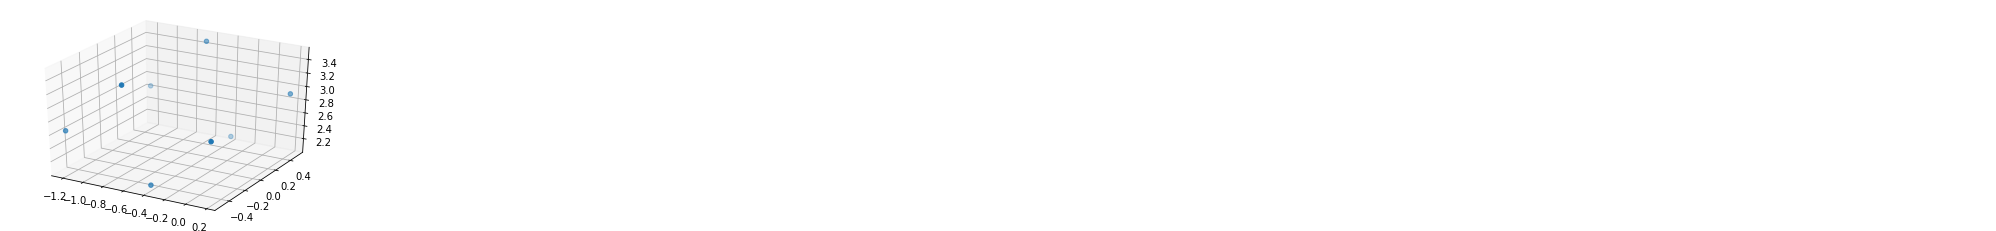

In [30]:
points_cam = points_cam_frame.transpose()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_cam[:, 0], points_cam[:, 1], points_cam[:, 2])
#ax.set_xlim3d(-101, 101)
#ax.set_ylim3d(-102, 102)
#ax.set_zlim3d(-103, 103)
plt.show()

In [31]:
intrinsic = [572.411400033838, 0.0, 320.0, 0.0, 572.4114000338382, 240, 0.0, 0.0, 1.0]
intrinsic = np.array(intrinsic).reshape((3, 3))
print(intrinsic)

[[572.41140003   0.         320.        ]
 [  0.         572.41140003 240.        ]
 [  0.           0.           1.        ]]


In [32]:
pixel_pos = np.matmul(intrinsic, points_cam_frame)
print(pixel_pos.transpose())

[[ 738.92315536 1120.192553      3.47494522]
 [1030.6690787   984.67835938    2.91030275]
 [ 151.60796987  922.11200542    2.64960961]
 [ 443.35389322  786.59781181    2.08496713]
 [ 738.92315536  547.78115297    3.47494522]
 [1030.6690787   412.26695935    2.91030275]
 [ 151.60796987  349.70060539    2.64960961]
 [ 443.35389322  214.18641177    2.08496713]]


In [33]:
img = cv2.imread('cube_zero.png')
print(img.shape)

(480, 640, 3)


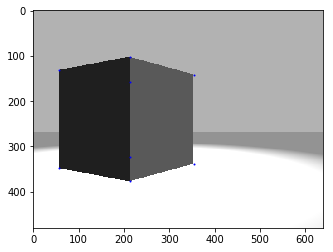

In [34]:
plt.imshow(img)
for row in pixel_pos.transpose():
    row[0] /= row[2]
    row[1] /= row[2]
    row[2] /= row[2]
    #print(row)
    if abs(row[0]) < 1000:
        #pass
        plt.scatter([row[0]], [row[1]], s = 1, c = 'blue')
plt.show()